In [10]:
import pickle 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from src.model.util import vis_transport

In [8]:
with open("scratch/Cycle_Graphs_log.pkl", "rb") as f: 
    cycle_info = pickle.load(f)

with open("scratch/Path_Graphs_log.pkl", "rb") as f: 
    path_info = pickle.load(f)

with open("scratch/Star_Graphs_log.pkl", "rb") as f: 
    star_info = pickle.load(f)

Let us analyze a few transport matrices. The main goal here is to get an idea of how optimal transport behaves for graphs of the same class with different sizes. The particular classes we will study here are cycle, path, and star graphs. 

Also, we notice that the star graph of base size of 100 flattens out, which is quite different from the other star graphs with smaller base sizes. And we want to examine its transport matrix to further debug its pattern. 

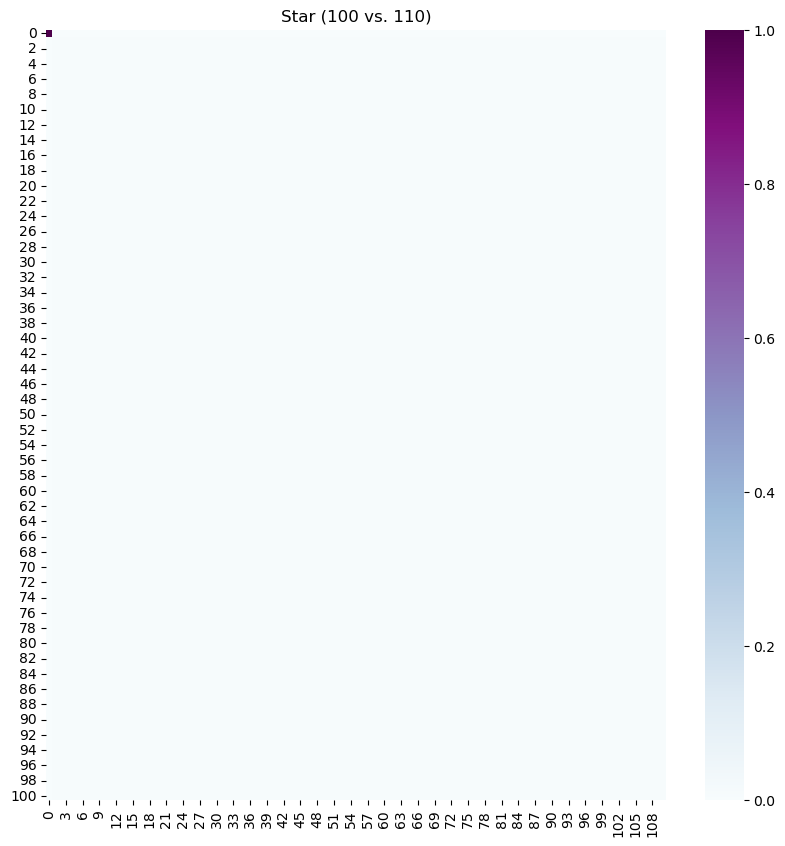

In [3]:
trans = star_info["trans"][(100, 110)]
vis_transport(trans, "Star (100 vs. 110)", annot=False, ratio=(10, 10))

It appears that the transport matrix for path graph of size 100 does not actually transport any mass. This signals that the entropic_gw algorithm has failed for this instance. We should further debug this base size at a later time. 

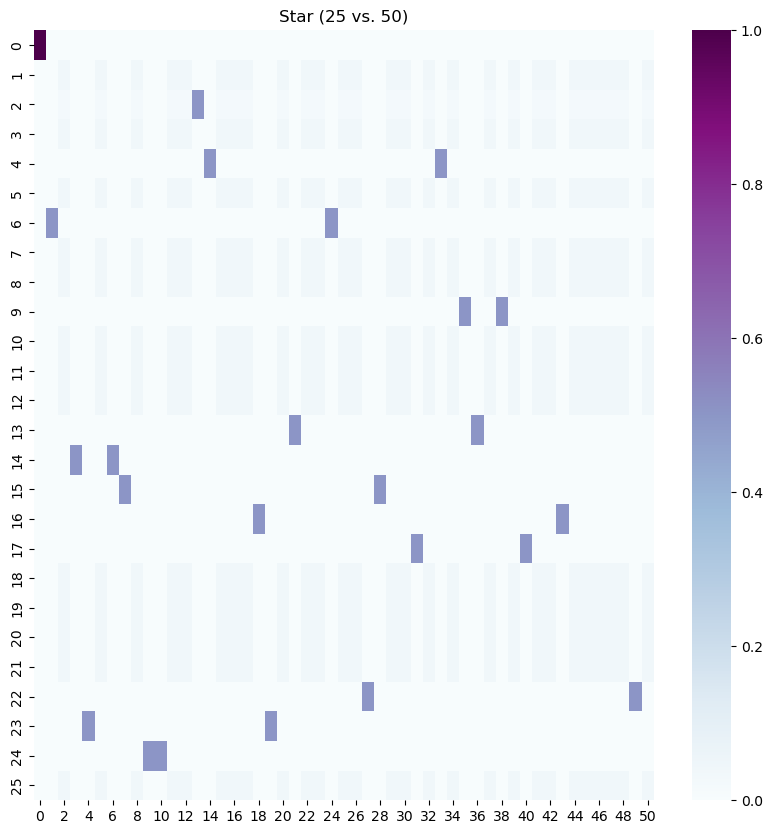

In [7]:
trans = star_info["trans"][(25, 50)]
vis_transport(trans, "Star (25 vs. 50)", annot=False, ratio = (10, 10))

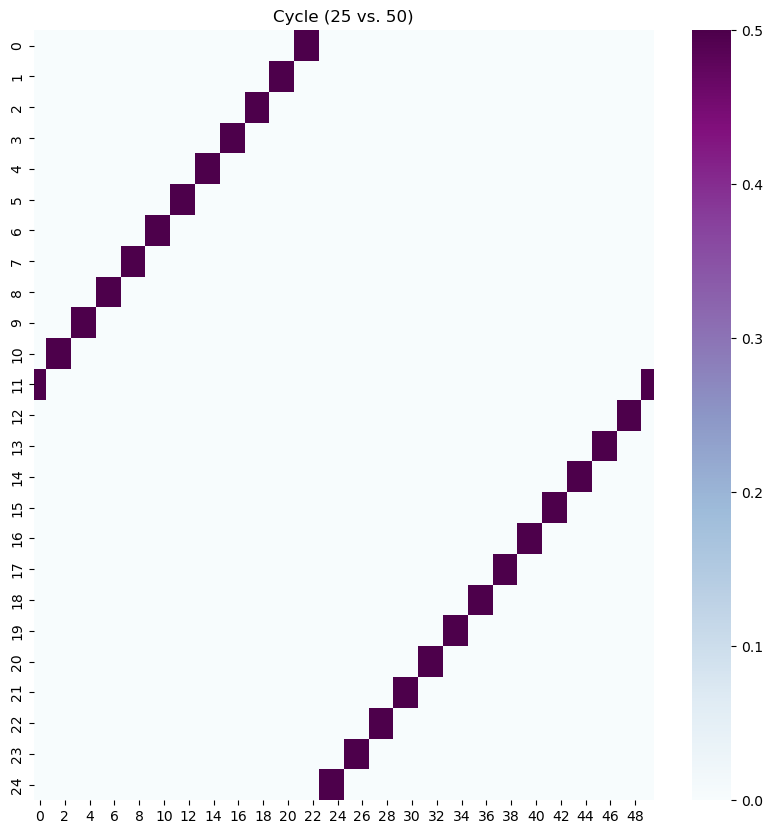

In [8]:
trans = cycle_info["trans"][(25, 50)]
vis_transport(trans, "Cycle (25 vs. 50)", annot=False, ratio = (10, 10))

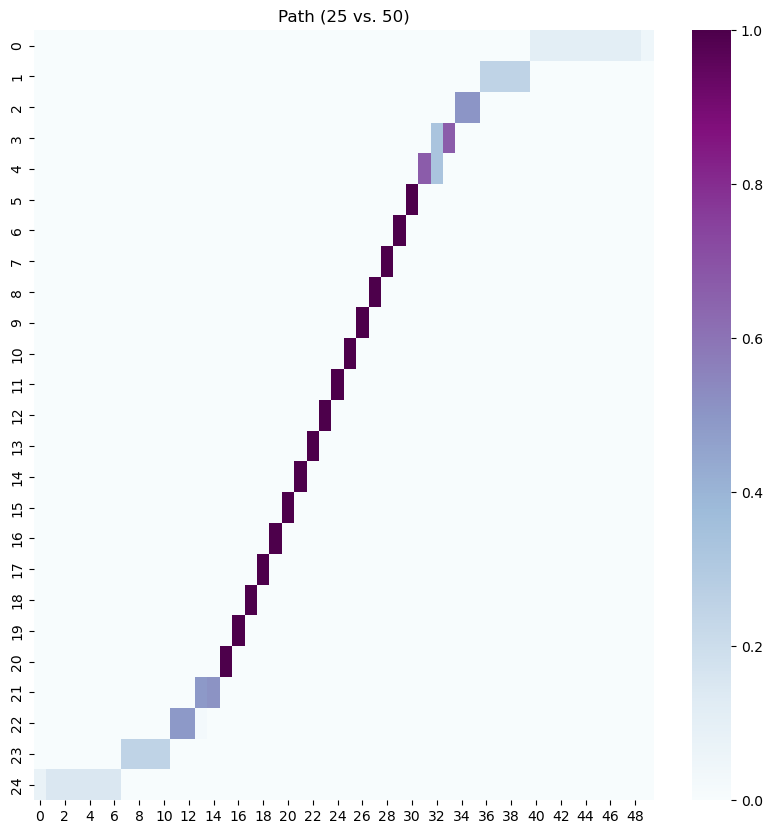

In [9]:
trans = path_info["trans"][(25, 50)]
vis_transport(trans, "Path (25 vs. 50)", annot=False, ratio = (10, 10))

## Analyzing Asymptotic Behavior of GW Growth

In [56]:
def extract_gwd(info: dict, base_size: int, diff: np.ndarray): 
    """
    Extract the sequence of gromov wasserstein distances 

    Parameters
    ----------
    info : dictionary
        Contains the information from the gromov-wasserstein
        growth experiments for a specific run
    
    base_size : int
        The base size of the sequence we want to extract

    diff : np.ndarray
        The sequence of the differences between the base_size 
        and the alternative size
    """

    res = []
    for i in diff: 
        res.append(info["gw_dist"][(base_size, base_size + i)])
    return np.array(res)

def display_fit(info: dict, base_size: int, diff: np.ndarray, 
                poly: int, mode: str, title: str, log = False): 
    """
    Display a specified linear regression fit result. 

    Parameters
    ----------
    info : dictionary
        Contains the information from the gromov-wasserstein
        growth experiments for a specific run
    base_size : int
        The base size of the sequence we want to extract
    diff : np.ndarray
        The sequence of the differences between the base_size 
        and the alternative size
    poly : int
        The polynomial factor to test. 
    mode : str
        Mode of the plot
    title : str
        Title of the plot
    log : bool
        Whether to log-transform the data

    """
    if log: 
        diff = diff[1:]
        x = np.log(diff) ** poly
    else: 
        x = diff ** poly
    y = extract_gwd(info, base_size, diff)
    model = sm.OLS(y, x)
    res = model.fit()
    print(res.summary())
    plt.figure()
    plt.plot(diff, y, color = "red", linewidth =3, label = "original")
    plt.plot(diff, x * res.params[0], color = "blue", linewidth =3, label = mode)
    plt.legend()
    plt.xlabel("Difference in Size")
    plt.ylabel("Gromov Wasserstein Distance")
    plt.title(title)
    plt.show()
    return model, res

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.107e+06
Date:                Tue, 31 Jan 2023   Prob (F-statistic):                   3.96e-128
Time:                        14:04:19   Log-Likelihood:                         0.47356
No. Observations:                  50   AIC:                                      1.053
Df Residuals:                      49   BIC:                                      2.965
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

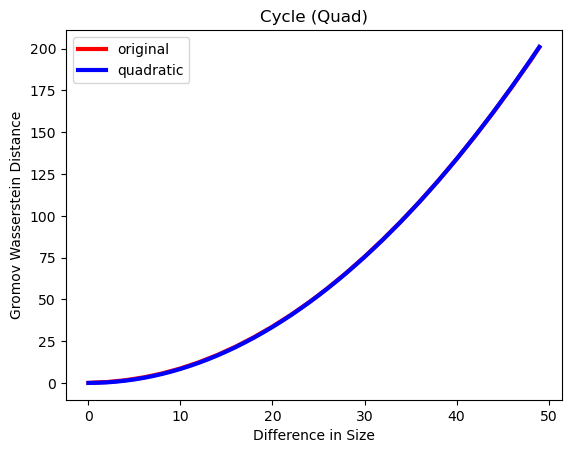

In [37]:
x = np.arange(0, 50, 1)
mod, res = display_fit(cycle_info, 25, x, poly = 2, mode="quadratic", title="Cycle (Quad)")

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.261e+05
Date:                Tue, 31 Jan 2023   Prob (F-statistic):                    1.91e-91
Time:                        14:20:06   Log-Likelihood:                         -123.05
No. Observations:                  50   AIC:                                      248.1
Df Residuals:                      49   BIC:                                      250.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

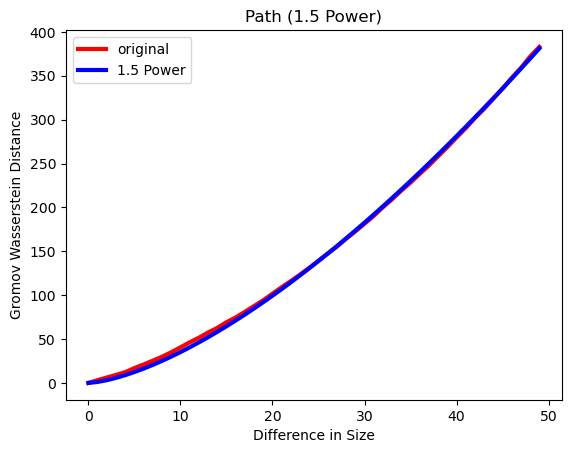

In [50]:
x = np.arange(0, 50, 1)
mod, res = display_fit(path_info, 25, x, poly = 1.5, mode="1.5 Power", title="Path (1.5 Power)")

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              3373.
Date:                Tue, 31 Jan 2023   Prob (F-statistic):                    3.91e-46
Time:                        14:29:38   Log-Likelihood:                          194.66
No. Observations:                  49   AIC:                                     -387.3
Df Residuals:                      48   BIC:                                     -385.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

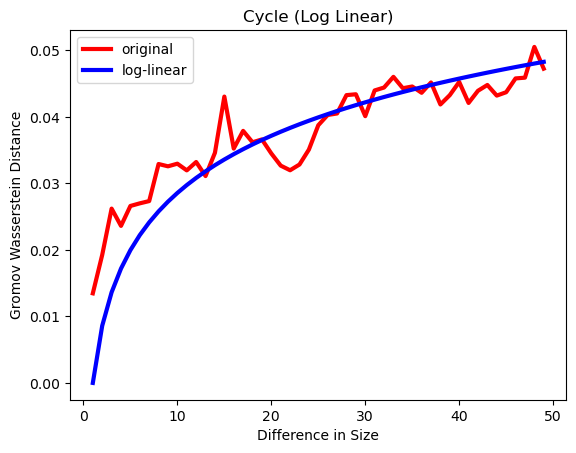

In [57]:
x = np.arange(0, 50, 1)
mod, res = display_fit(star_info, 25, x, poly = 1, mode="log-linear", title="Cycle (Log Linear)", log=True)